# 시계열 

   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  
(348, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB
None
         year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62

/tmp/ipykernel_519099/3346342206.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145
forecast_noaa,NaN,0.131141,-0.021393,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221
forecast_acc,NaN,0.127436,-0.030605,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054
forecast_under,NaN,0.119786,-0.013727,0.819576,0.815943,0.994373,0.838946,0.985670,0.983910,1.000000,0.691177


NameError: name 'plt' is not defined

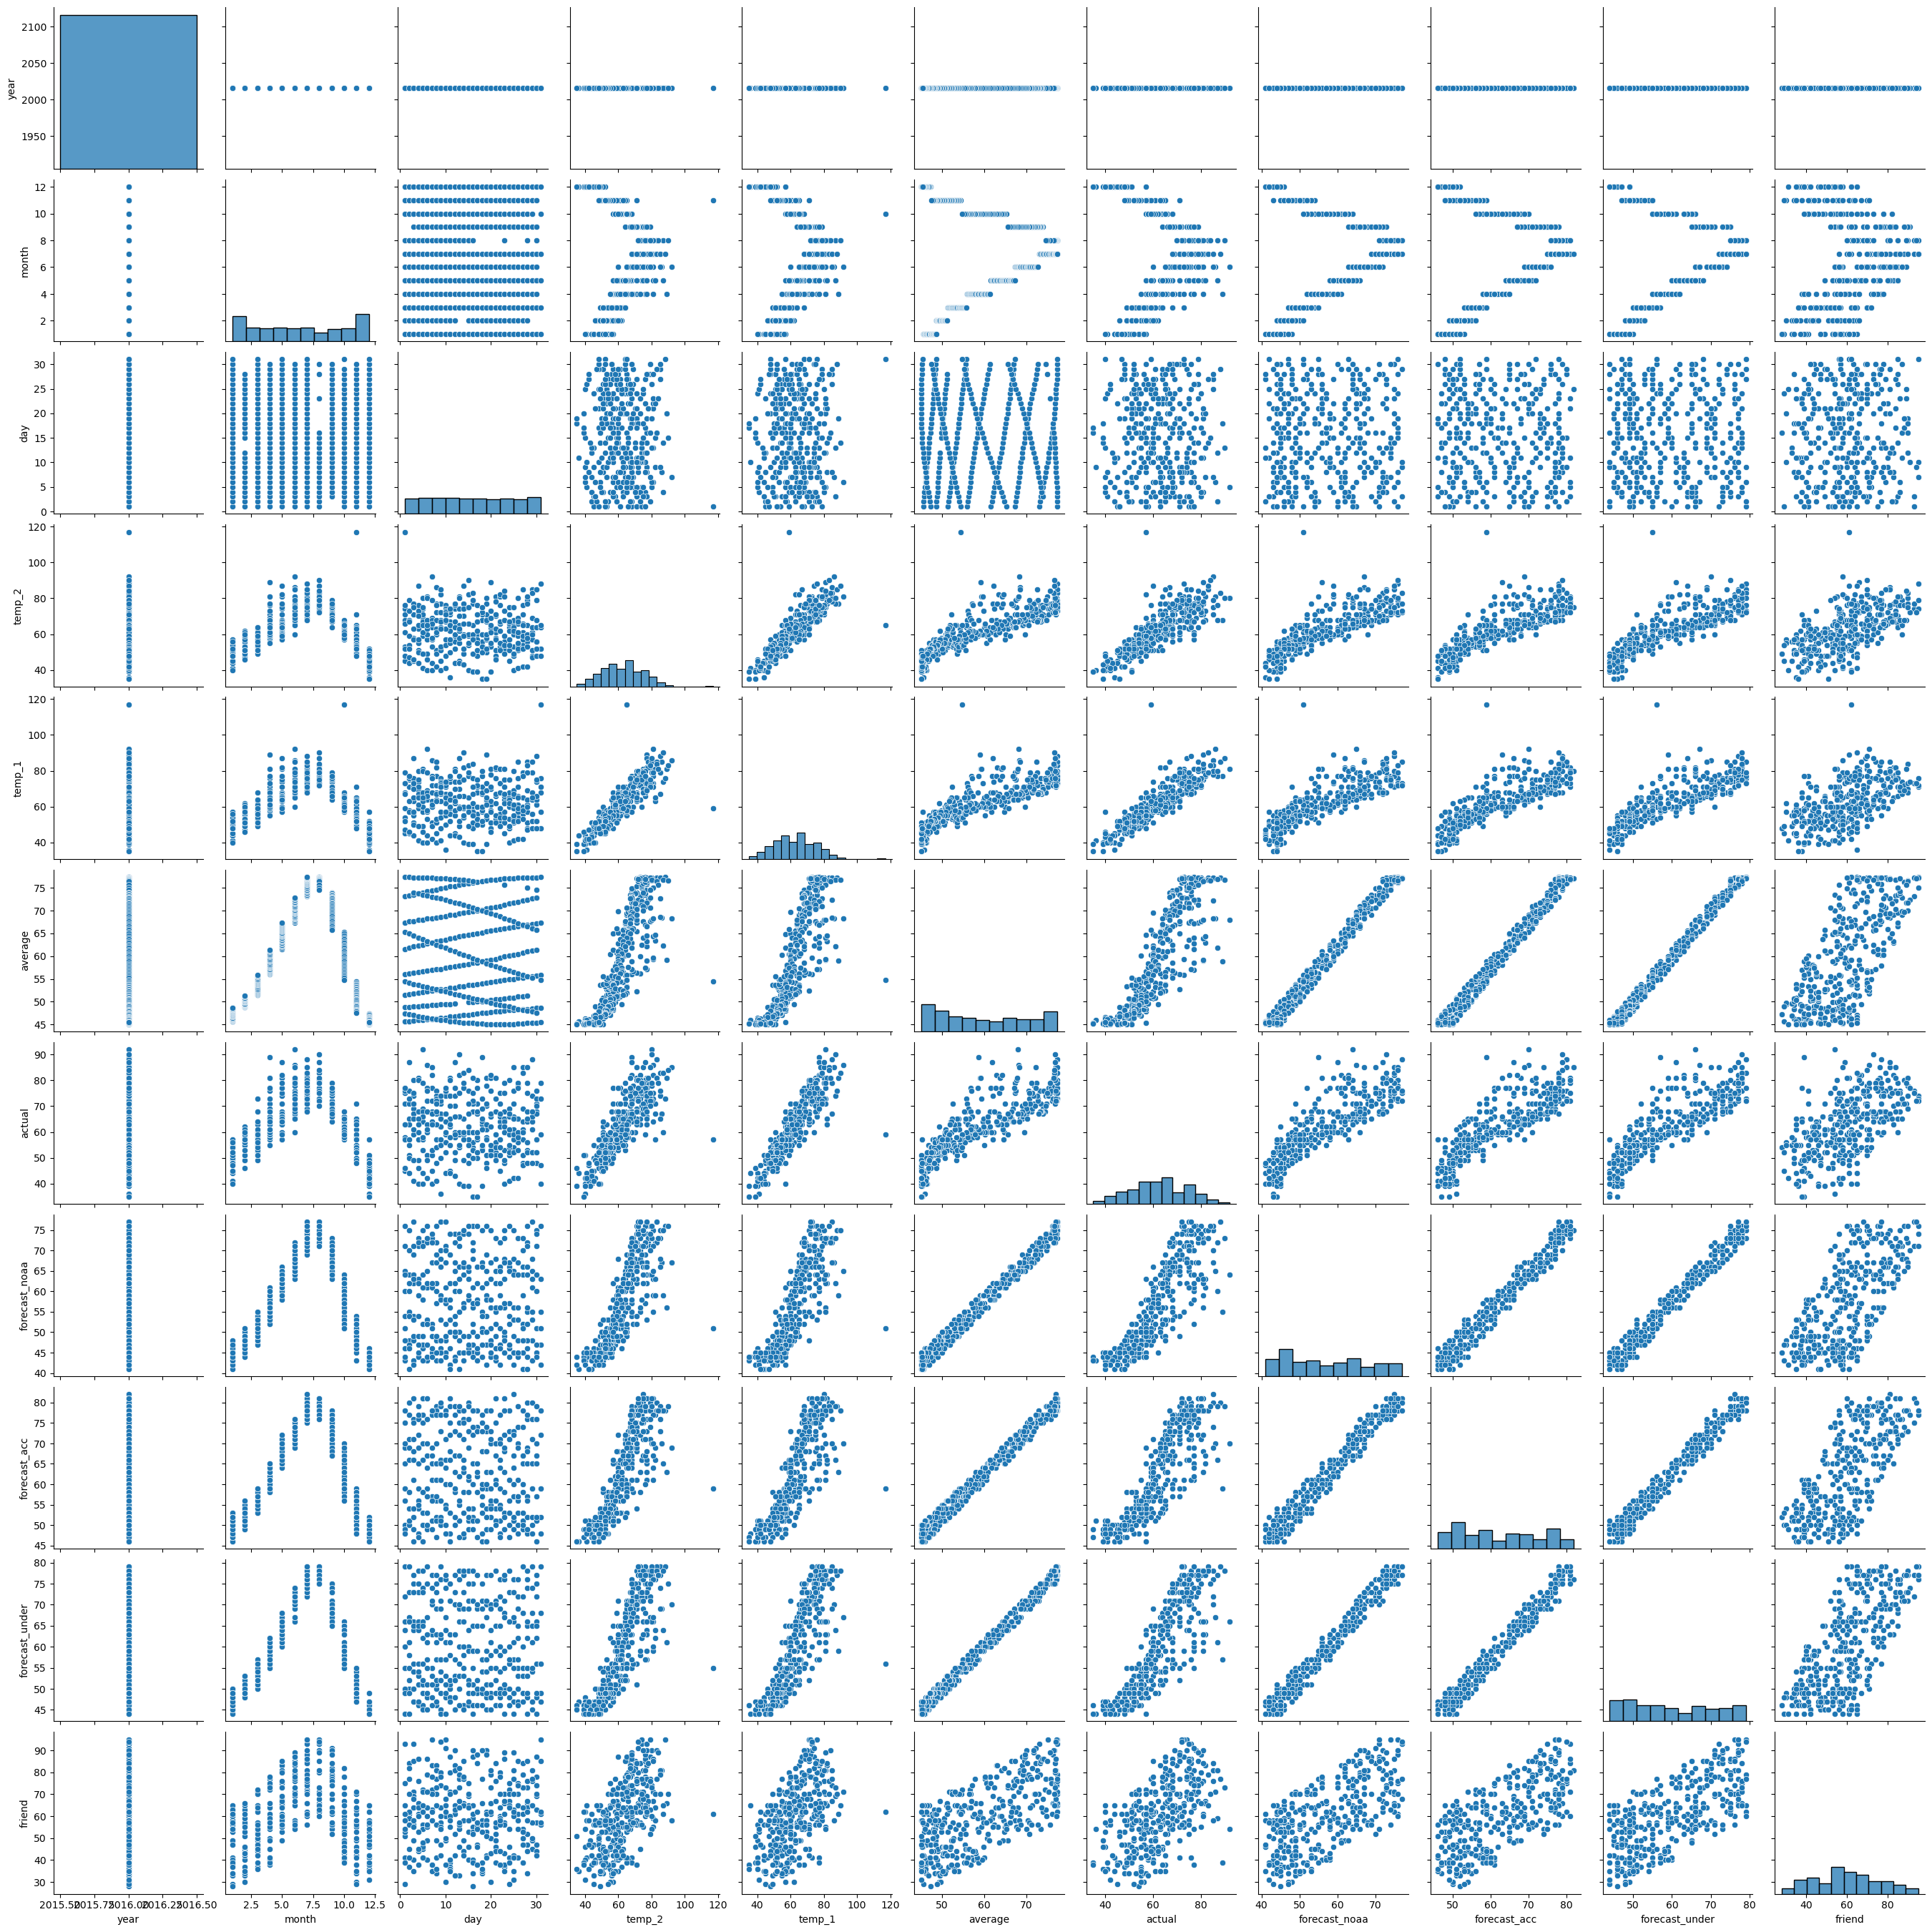

In [4]:

import pandas as pd 
import seaborn as sns
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem1.csv')
print(df.head())  # 상위 5개
print(df.shape)  # 데이터 형태
display(sns.pairplot(df)) # 변수별 상관계쑤
print(df.info()) # 각 컬럼 데이터 타입
print(df.describe()) # 기초 통계량
print(df.isnull().sum()) #결측치 확인


df['date'] =df['year'].astype('str')+'-'+df['month'].astype('str')+'-'+df['day'].astype('str')
df['date'] = pd.to_datetime(df['date'])

v = pd.DataFrame(pd.date_range(start=df['date'].dt.strftime('%Y-%m-%d').min(), end=df['date'].dt.strftime('%Y-%m-%d').max()))[0].dt.strftime('%Y-%m-%d').values
a=set(v) - set(df['date'].dt.strftime('%Y-%m-%d'))
print(a)
len(a)

display(df.corr())

# 데이터 분할
dfd = pd.get_dummies(df)
df_drop = dfd.drop(columns=['year','month','day','friend','date'])

X = df_drop.drop(columns=['actual'])
y = df_drop['actual']

from sklearn.model_selection import train_test_split

X_train,X_test , y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)


plt.show()
print('''
Answer
데이터 상에서 수치 결측치는 존재하지 않는다. 시계열 데이터 관점으로 봤을때, 18일치의 일자 데이터가 결측치로 존재한다.     
문제 해결시 시계열 방식으로 접근 하지 않을 것이기에 누락된 일자에 대해서 따로 결측치 처리를 해주지 않을 것이다.     
시계열 관점으로 해석을 할 경우 누락된 데이터는 평균 보간을 실시 하여 처리할 수 있다.     
      
데이터 시각화 결과 상관관계를 보이는 컬럼들이 확인되며 주기적 경향을 보이는 데이터들이 확인된다.    
    
year, month, day, week, 값은 불필요 컬럼으로 제외한다. week의 경우 원핫인코딩을 진행해서 추가한다.     
train셋과 test셋은 8:2비율로 나눠서 모델링을 진행한다.    
friend 컬럼의 경우 상관관계를 확인했을때 상대적으로 낮은 값을 가지기에 제외하고 학습을 진행한다.     
''')

Random Forest 모델 적합 및 검증

Random Forest 학습 및 예측 결과 해석

예측 결과 검정 해석, 중요변수 도출

변수 중요성 분석 및 그래프 출력

RandomForest r2_score :  0.8399186619591019
learning time  0.07331705093383789
temp_1 ,average , forecast_acc 순으로 변수 중요도를 확인 할 수 있다


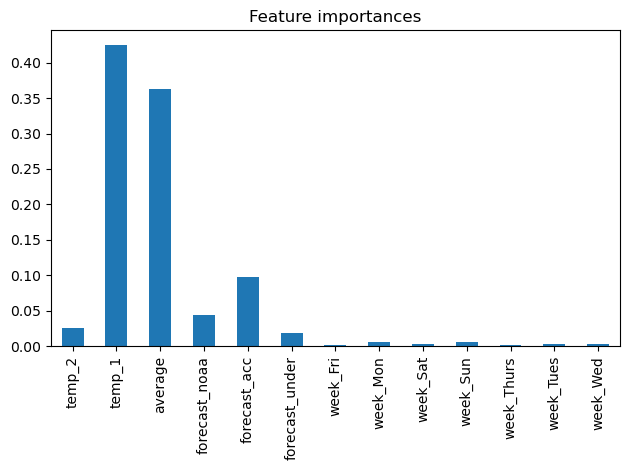

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt

result = []
rf = RandomForestRegressor(random_state=22)
start = time.time()
rf.fit(X_train,y_train)
end = time.time()

pred = rf.predict(X_test)
print('RandomForest r2_score : ',r2_score(y_test,pred))
print('learning time ',end-start)
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

print('temp_1 ,average , forecast_acc 순으로 변수 중요도를 확인 할 수 있다')

result.append([end-start,r2_score(y_test,pred)])

SVM(Support Vector Machine) 모델 적합 및 검증

svm 학습 및 예측 결과 해석

예측 결과 검정 해석, 중요변수 도출

변수 중요성 분석 및 그래프 출력

svm r2_score :  0.8138036782618503
learning time  0.004277467727661133
svm은 변수 중요도를 따로 추출 할 수 없다. r2_score의 경우 RandomForest에 비해 낮다


2번
데이터 설명 : 코로나19에 대한 나라별 데이터로 모델링 진행
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리
data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem2.csv location : 지역명
date : 일자
total_cases : 누적 확인자
total_deaths : 누적 사망자
new_tests : 검사자
population : 인구
new_vaccinations : 백신 접종자

In [24]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem2.csv')
df.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN


마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

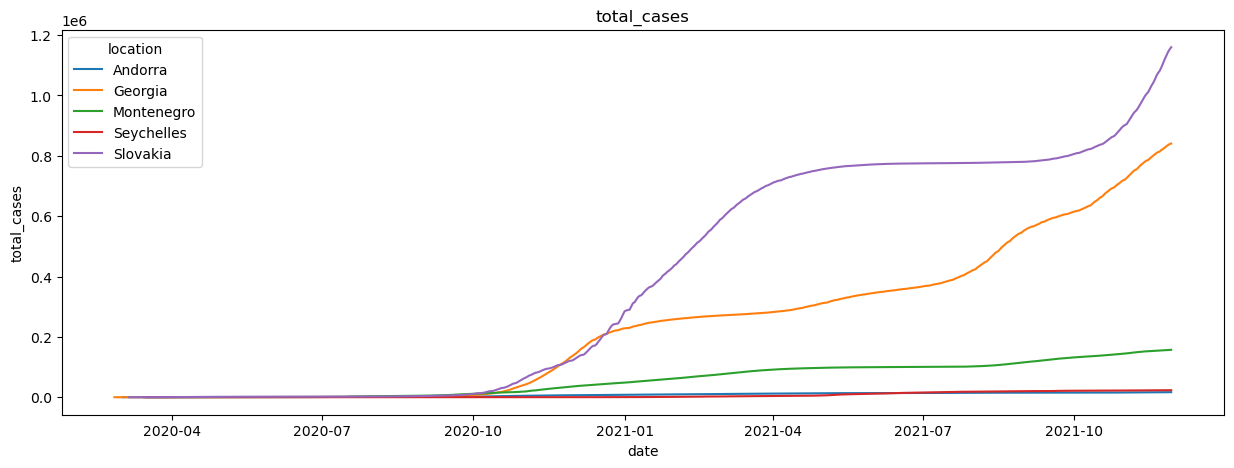

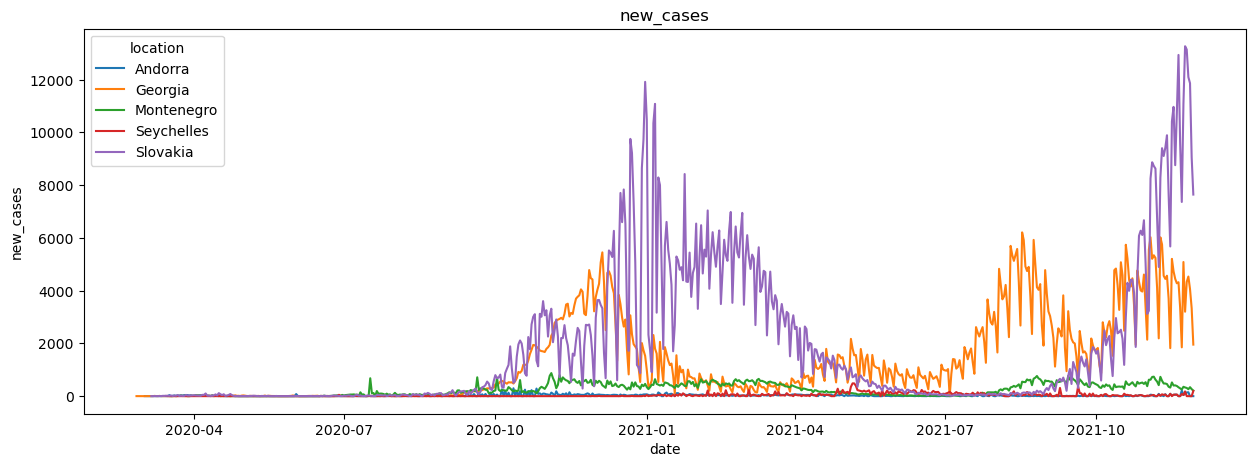

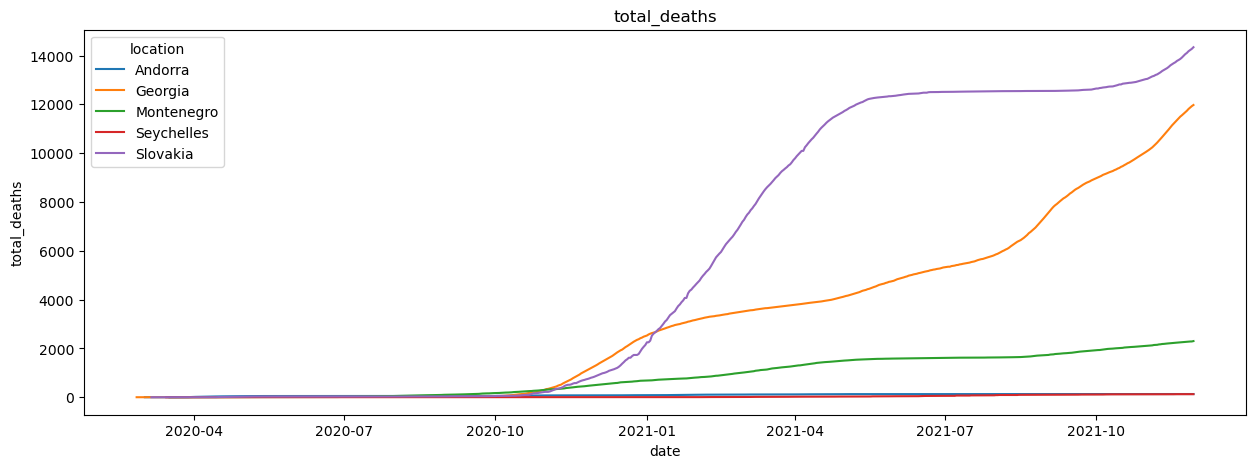

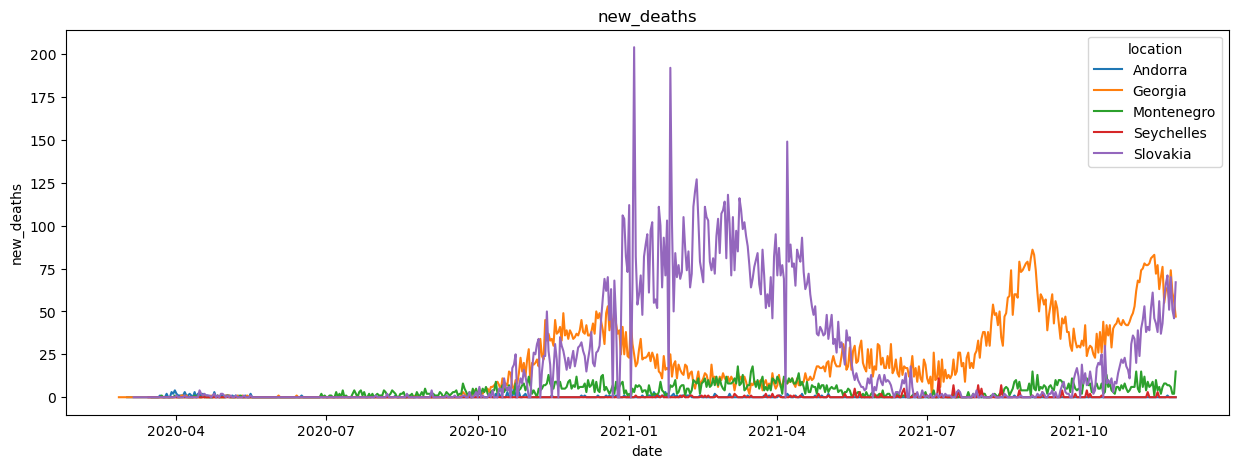

In [25]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem2.csv')
df['ratio'] = df['total_cases'] / df['population']


# 전체 데이터의 결측치 및 일일 확진, 사망자 확인
# 2021-11-30에는 new_tests , new_vaccinations값이 nan 이므로 제외
# 인구수 0인 케이스 제외
import matplotlib.pyplot as plt 
df = df.fillna(0)
df['date']  = pd.to_datetime(df['date'])
df = df[df.date != pd.to_datetime('2021-11-30')]
df = df[df.population !=0]

for location in df.location.unique():
    lo = df[df.location == location]
    df.loc[lo.index,'new_cases'] =lo.total_cases.diff().values
    df.loc[lo.index[0], 'new_cases'] = lo['total_cases'].values[0]

    df.loc[lo.index,'new_deaths'] =lo.total_deaths.diff().values
    df.loc[lo.index[0], 'new_deaths'] = lo['total_deaths'].values[0]
    
    df.loc[lo.index, 'total_vacciantions'] = lo['new_vaccinations'].cumsum().values
    df.loc[lo.index, '7days_new_case'] = lo['new_tests'].rolling(7).sum().fillna(0).values

import seaborn as sns
import matplotlib.pyplot as plt


locations = df.groupby(['location']).tail(1).sort_values('ratio',ascending=False).location.head(5).values
target = df[df.location.isin(locations)].reset_index(drop=True)
for v in ['total_cases','new_cases','total_deaths','new_deaths']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data=target,x= 'date',y=v,hue='location')
    plt.show()

코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화


코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그다음의 일주일에 영향을 준다.     
일일 사망자수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소 될수 있다. 
국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다



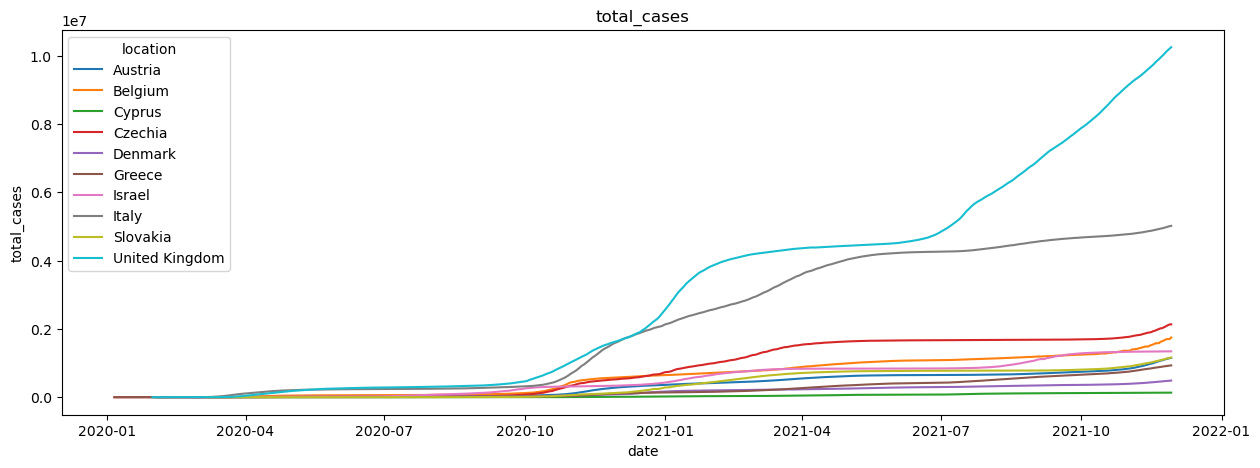

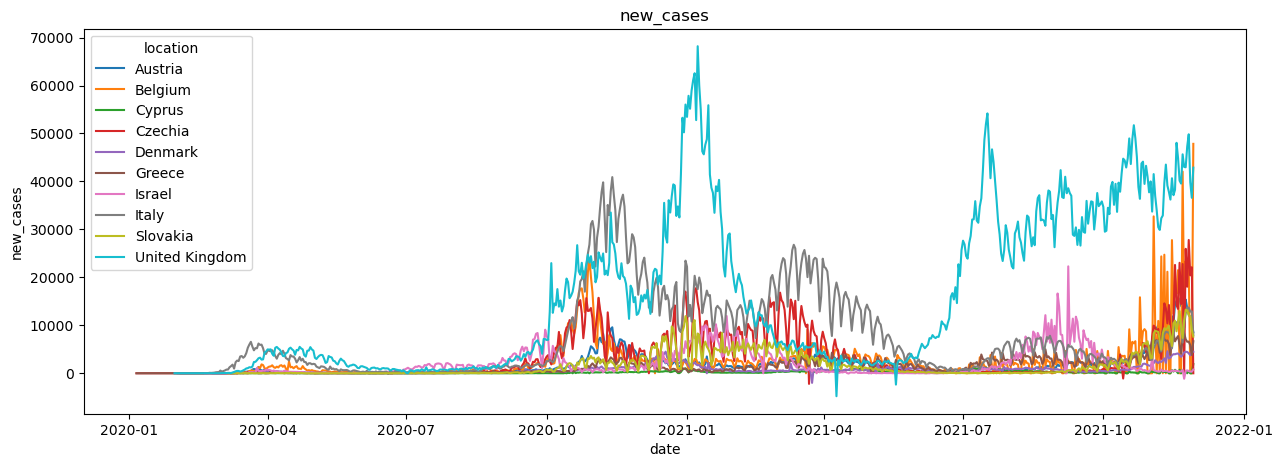

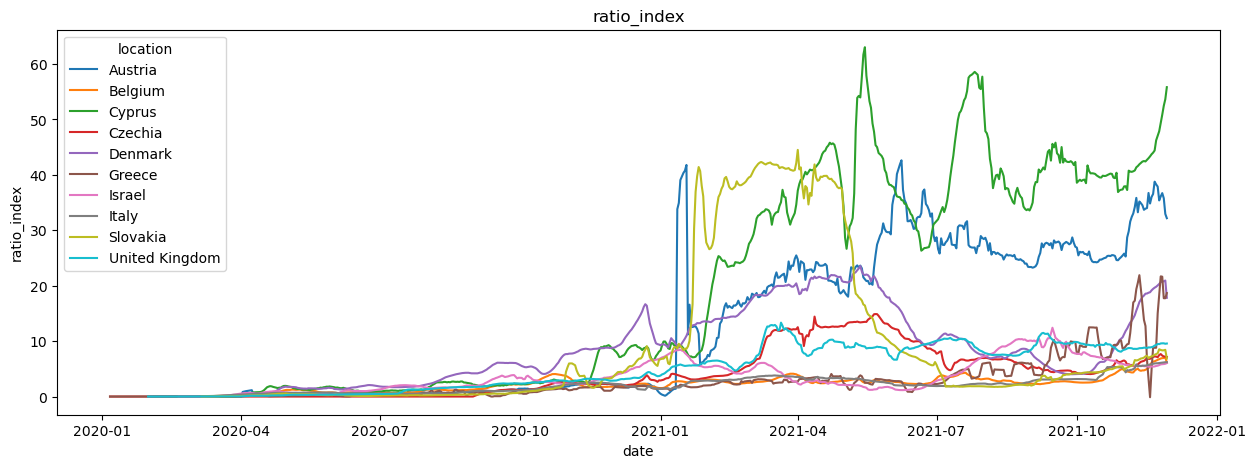

In [26]:
# 위험지수 =  ( 최근일주일 누적 확진자 / 인구수)   + (일일 사망자 / 인구수) - (누적 백신 인구 / 인구수) * 보정 상수) * 보정 상수
print('''
코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그다음의 일주일에 영향을 준다.     
일일 사망자수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소 될수 있다. 
국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다
''')

def ratio_index(x):
    value = (x['7days_new_case'] / x['population'] + x['new_deaths'] / x['population'] - x['total_vacciantions'] / x['population']*0.001) *100
    return value


df['ratio_index'] = df.apply(ratio_index,axis=1)


locations = df.groupby(['location']).tail(1).sort_values('ratio_index',ascending=False).location.head(10).values
target = df[df.location.isin(locations)].reset_index(drop=True)
for v in ['total_cases','new_cases','ratio_index']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data=target,x= 'date',y=v,hue='location')
    plt.show()

한국의 코로나 신규 확진자 예측해라(선형 시계열모델 + 비선형시계열 각각 한개씩 만들어라)
선형시계열 - arma 비선형 시계열 - arima

In [17]:
ko = df[df.location =='South Korea'].reset_index(drop=True)
ko.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio,new_cases,new_deaths,total_vacciantions,7days_new_case,ratio_index
0,South Korea,2020-01-21,0.0,0.0,0.0,51305184.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,South Korea,2020-01-22,1.0,0.0,5.0,51305184.0,0.0,1.949121e-08,1.0,0.0,0.0,0.0,0.0
2,South Korea,2020-01-23,1.0,0.0,0.0,51305184.0,0.0,1.949121e-08,0.0,0.0,0.0,0.0,0.0
3,South Korea,2020-01-24,2.0,0.0,0.0,51305184.0,0.0,3.898242e-08,1.0,0.0,0.0,0.0,0.0
4,South Korea,2020-01-25,2.0,0.0,0.0,51305184.0,0.0,3.898242e-08,0.0,0.0,0.0,0.0,0.0


                            AutoReg Model Results                             
Dep. Variable:              new_cases   No. Observations:                  679
Model:                     AutoReg(3)   Log Likelihood               -4376.552
Method:               Conditional MLE   S.D. of innovations            156.844
Date:                Fri, 14 Mar 2025   AIC                           8763.103
Time:                        17:47:31   BIC                           8785.684
Sample:                             3   HQIC                          8771.846
                                  679                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.0652      7.966      1.264      0.206      -5.547      25.678
new_cases.L1     0.9978      0.037     27.163      0.000       0.926       1.070
new_cases.L2    -0.3117      0.052     -6.00

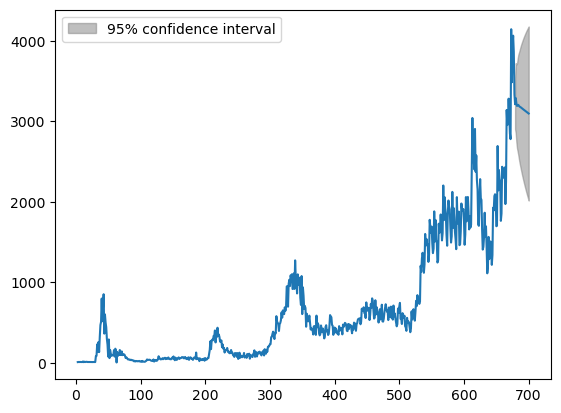

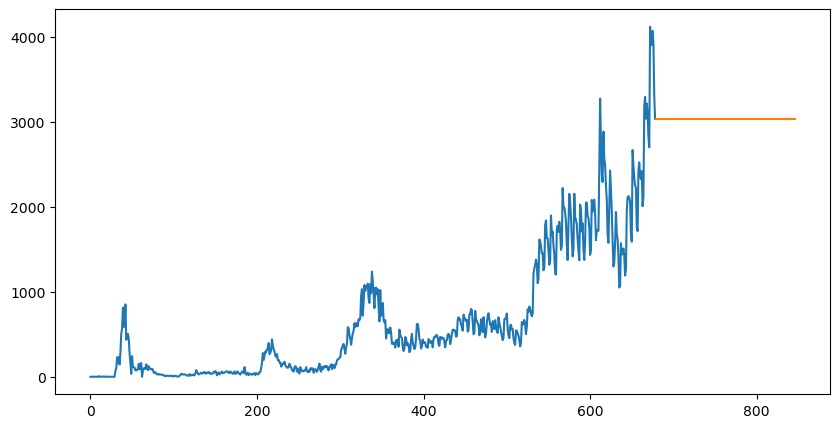

In [18]:
# 선형모델 - arma.

from statsmodels.tsa.ar_model import AutoReg
mod = AutoReg(ko.new_cases, 3, old_names=False)
res = mod.fit()
print(res.summary())
fig = res.plot_predict(1,700)

# 비선형 모델 -arima 사용
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ko.new_cases, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=24*7)

plt.figure(figsize=(10,5))
plt.plot(ko.new_cases)
plt.plot(forecast)

비모수

In [27]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem2.csv')
df.head()

,name,life span
0,sample1,10000
1,sample2,9000
2,sample3,9500
3,sample4,10000
4,sample5,10000


귀무가설, 연구가설 세우기

In [28]:
print('''
귀무가설 : 데이터의 중위수는 1만 시간이다     
연구가설 : 데이터의 중위수는 1만 시간이 아니다''')


귀무가설 : 데이터의 중위수는 1만 시간이다     
연구가설 : 데이터의 중위수는 1만 시간이 아니다


유효한 데이터의 개수는?

In [29]:
print('중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다. 그 숫자는 : ',df[df['life span']==10000].shape[0])

df_fillter = df[df['life span'] != 10000]

중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다. 그 숫자는 :  4


검정통계량 및 연구가설 채택 여부를 작성하라

In [30]:
from scipy.stats import wilcoxon
static, pvalue = wilcoxon(df_fillter['life span']-10000)
print('검정통계량은 ',static,'이다. pvalue는 ',pvalue,'로 5% 유의 수준에서 귀무가설을 기각할 수 없다. 연구가설을 채택하지 않는다. ')

검정통계량은  8.5 이다. pvalue는  0.1953125 로 5% 유의 수준에서 귀무가설을 기각할 수 없다. 연구가설을 채택하지 않는다. 


공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다

5.1 귀무가설과 연구가설을 제시하시오

5.2 검정 후 귀무가설 기각 여부 제시

In [32]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


귀무가설 :ㅣ공장 X, Y, Z의 중위수 차이가 없다 (즉, 출하 소요시간의 중위수가 세 공장에서 동일하다).
대립가설 : 적어도 하나의 공장에서 중위수가 다르다 (즉, 출하 소요시간의 중위수가 적어도 하나의 공장에서 차이가 난다).

In [35]:
factory_X = df[df['공장명']=='X']['출하 소요시간']
factory_Y = df[df['공장명']=='Y']['출하 소요시간']
factory_Z = df[df['공장명']=='Z']['출하 소요시간']

In [37]:
import numpy as np
import scipy.stats as stats

# Kruskal-Wallis 검정 수행
H_statistic, p_value = stats.kruskal(factory_X, factory_Y, factory_Z)

# 결과 출력
print(f"Kruskal-Wallis H 통계량: {H_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# 귀무가설 기각 여부 확인 (유의수준 0.05)
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 공장 간 중위수 차이가 존재함")
else:
    print("귀무가설 채택: 공장 간 중위수 차이가 없음")

Kruskal-Wallis H 통계량: 0.7218
p-value: 0.6971
귀무가설 채택: 공장 간 중위수 차이가 없음
